In [8]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic


In [3]:
bmms_overview = pd.read_excel('../Data/Input/BMMS_overview.xls')
rmms_overview = pd.read_excel('../Data/Input/RMMS_overview.xls')

roads_overview = pd.read_csv('../Data/Input/_roads.tsv', sep = "\t")
roads_LRP_overview = pd.read_csv('../Data/Input/Roads_InfoAboutEachLRP.csv')

C:\Users\sanne\AppData\Local\Temp\ipykernel_37552\3629466442.py:4: DtypeWarning: Columns (0: Unnamed: 571, 1: Unnamed: 574, 2: Unnamed: 577, 3: Unnamed: 580, 4: Unnamed: 583, 5: Unnamed: 586, 6: Unnamed: 589, 7: Unnamed: 592, 8: Unnamed: 595, 9: Unnamed: 598, 10: Unnamed: 601, 11: Unnamed: 604, 12: Unnamed: 607, 13: Unnamed: 610, 14: Unnamed: 613, 15: Unnamed: 616, 16: Unnamed: 619, 17: Unnamed: 622, 18: Unnamed: 625, 19: Unnamed: 628, 20: Unnamed: 631, 21: Unnamed: 634, 22: Unnamed: 637, 23: Unnamed: 640, 24: Unnamed: 643, 25: Unnamed: 646, 26: Unnamed: 649, 27: Unnamed: 652, 28: Unnamed: 655, 29: Unnamed: 658, 30: Unnamed: 661, 31: Unnamed: 664, 32: Unnamed: 667, 33: Unnamed: 670, 34: Unnamed: 673, 35: Unnamed: 676, 36: Unnamed: 679, 37: Unnamed: 682, 38: Unnamed: 685, 39: Unnamed: 688, 40: Unnamed: 691, 41: Unnamed: 694, 42: Unnamed: 697, 43: Unnamed: 700, 44: Unnamed: 703, 45: Unnamed: 706, 46: Unnamed: 709, 47: Unnamed: 712, 48: Unnamed: 715, 49: Unnamed: 718, 50: Unnamed: 721, 51

In [12]:
bmms_overview.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.8,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.702889,90.450389,bcs1
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.693611,90.478833,bcs1
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.704583,90.518833,road_precise
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.88,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699833,90.530722,bcs1
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699667,90.530722,bcs1


In [13]:
rmms_overview.head()

,road,name,length,start,end
0,N1,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,462,Dhaka (Jatrabari),Teknaf
1,N101,Comilla - Bibirbazar Land Port Connecting Road,6,Comilla (Balutopa),Bibirbazar
2,N102,Comilla (Mainamati)-Brahmanbaria (Sarail) Road,83,Mainamati,Sarail (Katihat)
3,N103,Brahmanbaria Town Portion (Kuatali-Ghaturia),5,Kuatali,Ghaturia
4,N104,Feni-Noakhali Road,50,Feni Post office,Sonapur


In [14]:
roads_overview.head()


,road,lrp1,lat1,lon1,lrp2,lat2,lon2,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 4035,Unnamed: 4036,Unnamed: 4037,Unnamed: 4038,Unnamed: 4039,Unnamed: 4040,Unnamed: 4041,Unnamed: 4042,Unnamed: 4043,Unnamed: 4044
0,N1,LRPS,23.706028,90.443333,LRPSa,23.702917,90.450417,LRPSb,23.702778,90.450472,...,92.29825,LRP466c,20.864667,92.298194,LRP467,20.862972,92.298083,LRPE,20.862917,92.298083
1,N101,LRPS,23.454139,91.212861,LRPSa,23.461889,91.212000,LRP001,23.462944,91.211806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N102,LRPS,23.478972,91.118194,LRPSa,23.481583,91.116777,LRPSb,23.486666,91.113361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N103,LRPS,23.957028,91.115528,LRP001,23.961917,91.113611,LRP001a,23.967666,91.111889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N104,LRPS,23.009667,91.399416,LRPSa,23.009278,91.395250,LRP001,23.009306,91.389805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
roads_overview.columns.tolist()[:40]

['road',
 'lrp1',
 'lat1',
 'lon1',
 'lrp2',
 'lat2',
 'lon2',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39']

In [16]:
roads_overview.iloc[0]

road                    N1
lrp1                  LRPS
lat1             23.706028
lon1             90.443333
lrp2                 LRPSa
                   ...    
Unnamed: 4040    20.862972
Unnamed: 4041    92.298083
Unnamed: 4042         LRPE
Unnamed: 4043    20.862917
Unnamed: 4044    92.298083
Name: 0, Length: 4045, dtype: object

In [17]:
roads_overview.columns

Index(['road', 'lrp1', 'lat1', 'lon1', 'lrp2', 'lat2', 'lon2', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 4035', 'Unnamed: 4036', 'Unnamed: 4037', 'Unnamed: 4038',
       'Unnamed: 4039', 'Unnamed: 4040', 'Unnamed: 4041', 'Unnamed: 4042',
       'Unnamed: 4043', 'Unnamed: 4044'],
      dtype='str', length=4045)

In [18]:
cols = roads_overview.columns.tolist()

## rename unnamed columns
start = cols.index("lon2") + 1
tail = cols[start:]

new_tails = []
idx = 3
for i in range(0, len(tail), 3):
    new_tails.extend([f"lrp{idx}", f"lat{idx}", f"lon{idx}"])
    idx += 1

new_cols = cols[:start] + new_tails
new_cols

roads = roads_overview.copy()
roads.columns = new_cols

# Reshape wide -> long
long = pd.wide_to_long(
    roads,
    stubnames=["lrp", "lat", "lon"],
    i="road",
    j="idx",
    sep="",
    suffix=r"\d+"
).reset_index()

# Clean rows
long = long[long["lrp"].notna() & (long["lrp"].astype(str).str.strip() != "")]
long["lat"] = pd.to_numeric(long["lat"], errors="coerce")
long["lon"] = pd.to_numeric(long["lon"], errors="coerce")

In [19]:
long.head()

,road,idx,lrp,lat,lon
0,N1,1,LRPS,23.706028,90.443333
1,N101,1,LRPS,23.454139,91.212861
2,N102,1,LRPS,23.478972,91.118194
3,N103,1,LRPS,23.957028,91.115528
4,N104,1,LRPS,23.009667,91.399416


# Basic information
## Data
- bmms_overview: processed from raw BMMS files
21407 rows
relevant information: LRPName, bridge length
- rmms_overview: processed from raw RMMS files
- roads.tsv
- InfoAboutEachLRP

In [4]:
bmms_overview.info()

<class 'pandas.DataFrame'>
RangeIndex: 21407 entries, 0 to 21406
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   road              21407 non-null  str    
 1   km                21406 non-null  float64
 2   type              21407 non-null  str    
 3   LRPName           21407 non-null  str    
 4   name              21060 non-null  object 
 5   length            21398 non-null  float64
 6   condition         21407 non-null  str    
 7   structureNr       21407 non-null  int64  
 8   roadName          21406 non-null  str    
 9   chainage          21407 non-null  object 
 10  width             18290 non-null  float64
 11  constructionYear  18289 non-null  float64
 12  spans             18290 non-null  float64
 13  zone              21406 non-null  str    
 14  circle            21406 non-null  str    
 15  division          21406 non-null  str    
 16  sub-division      21406 non-null  str    
 17  lat 

In [6]:
bmms_overview.head()

,road,km,type,LRPName,name,length,condition,structureNr,roadName,chainage,width,constructionYear,spans,zone,circle,division,sub-division,lat,lon,EstimatedLoc
0,N1,1.800,Box Culvert,LRP001a,.,11.30,A,117861,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,1.8,19.5,2005.0,2.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.702889,90.450389,bcs1
1,N1,4.925,Box Culvert,LRP004b,.,6.60,A,117862,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,4.925,35.4,2006.0,1.0,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.693611,90.478833,bcs1
2,N1,8.976,PC Girder Bridge,LRP008b,Kanch pur Bridge.,394.23,A,119889,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,8.976,NaN,NaN,NaN,Dhaka,Dhaka,Narayanganj,Narayanganj-1,23.704583,90.518833,road_precise
3,N1,10.880,Box Culvert,LRP010b,NOYAPARA CULVERT,6.30,A,112531,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.88,12.2,1992.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699833,90.530722,bcs1
4,N1,10.897,Box Culvert,LRP010c,ADUPUR CULVERT,6.30,A,112532,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,10.897,12.2,1984.0,2.0,Dhaka,Dhaka,Narayanganj,Vitikandi,23.699667,90.530722,bcs1


In [5]:
rmms_overview.info()

<class 'pandas.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   road    927 non-null    str  
 1   name    927 non-null    str  
 2   length  927 non-null    int64
 3   start   926 non-null    str  
 4   end     926 non-null    str  
dtypes: int64(1), str(4)
memory usage: 36.3 KB


In [20]:
rmms_overview.head()

,road,name,length,start,end
0,N1,Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...,462,Dhaka (Jatrabari),Teknaf
1,N101,Comilla - Bibirbazar Land Port Connecting Road,6,Comilla (Balutopa),Bibirbazar
2,N102,Comilla (Mainamati)-Brahmanbaria (Sarail) Road,83,Mainamati,Sarail (Katihat)
3,N103,Brahmanbaria Town Portion (Kuatali-Ghaturia),5,Kuatali,Ghaturia
4,N104,Feni-Noakhali Road,50,Feni Post office,Sonapur


In [21]:
long.info()

<class 'pandas.DataFrame'>
Index: 52210 entries, 0 to 1192095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   road    52210 non-null  str    
 1   idx     52210 non-null  int64  
 2   lrp     52210 non-null  str    
 3   lat     52210 non-null  float64
 4   lon     52210 non-null  float64
dtypes: float64(2), int64(1), str(2)
memory usage: 2.4 MB


In [23]:
long.head()

,road,idx,lrp,lat,lon
0,N1,1,LRPS,23.706028,90.443333
1,N101,1,LRPS,23.454139,91.212861
2,N102,1,LRPS,23.478972,91.118194
3,N103,1,LRPS,23.957028,91.115528
4,N104,1,LRPS,23.009667,91.399416


In [24]:
roads_LRP_overview.info()

<class 'pandas.DataFrame'>
RangeIndex: 52210 entries, 0 to 52209
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   road      52210 non-null  str    
 1   chainage  52210 non-null  float64
 2   lrp       52210 non-null  str    
 3   lat       52210 non-null  float64
 4   lon       52210 non-null  float64
 5   type      52210 non-null  str    
 6   name      52210 non-null  str    
dtypes: float64(3), str(4)
memory usage: 2.8 MB


In [26]:
roads_LRP_overview.head(10)

,road,chainage,lrp,lat,lon,type,name
0,N1,0.000,LRPS,23.706028,90.443333,Others,Start of Road after Jatrabari Flyover infront...
1,N1,0.814,LRPSa,23.702917,90.450417,Culvert,Box Culvert
2,N1,0.822,LRPSb,23.702778,90.450472,CrossRoad,Intersection with Z1101
3,N1,1.000,LRP001,23.702139,90.451972,KmPost,Km post missing
4,N1,2.000,LRP002,23.697889,90.460583,KmPost,Km post missing
5,N1,2.130,LRP002a,23.697361,90.461667,Culvert,Box culvert
6,N1,3.000,LRP003,23.693833,90.469138,KmPost,Km post missing
7,N1,4.000,LRP004,23.693611,90.478777,KmPost,Km post missing
8,N1,4.175,LRP004a,23.693805,90.480527,"SideRoad,Right",Road to Narayanganj(R111)
9,N1,5.000,LRP005,23.694750,90.488500,KmPost,Km post missing


# Bridges
## approach
The LRP of the bridges (bmms_overview) should be in info_about_each LRP/_roads

Compare, see where not matching

Logic LRP naming: LRP number a,b,c. The number is the kilometer from the LRPS (start): within. If multiple LRP's within the same kilometer, then it's named like a, b, c.

Using the drainage you can check whether the name of the lrp and the distance matches.

Check whether the bridge is located at the correct road.
## Bridges, check whether the chainage is matching (DONE)
1. loop over de lrps per road
2. go over every bridge for that road
3. take the chainage of the road
4. check whether the chainage of the bridge is possible to link in between two lrp's of the road

Next steps: visually check whether this list is correct. So loop at the map and search for the bridges with status 'out-of-range'. Check whether they indeed seem to be out of range.

This is not possible, since all out-of-range bridge now get the Nan value

vizualisation shows that bridges are marked as 'ok', but are definitely not on the road.

another approach needed.

## bridges check on distance (NOT DONE)
1. Find the LRP before and after the bridge
2. Get de lon and lat of the three LRP's
3. Calculate distance between LRP bridge and the two LRP's of the roads
4. If distance is outside threshold for both > incorrect

In [115]:
def find_bridge_lrp_intervals(bmms_overview, roads_LRP_overview):
    results = []

    for road in bmms_overview['road'].unique():

        # LRPs for this road
        lrps = (
            roads_LRP_overview
            .loc[roads_LRP_overview['road'] == road]
            .sort_values('chainage')
            .reset_index()
        )

        if len(lrps) < 2:
            continue  # cannot form intervals

        lrp_chainage = lrps['chainage'].to_numpy()

        bridges = bmms_overview[bmms_overview['road'] == road]

        for bridge_idx, bridge in bridges.iterrows():
            bridge_chainage = bridge['chainage']

            #what if there're nan values?
            if pd.isna(bridge_chainage):
                results.append({
                    'road': road,
                    'start_lrp_index': None,
                    'end_lrp_index': None,
                    'bridge_index': bridge_idx,
                    'status': 'missing_chainage'
                })
                continue

            #Lrp of the bridge in between two road lrp's, based on chainage
            idx = np.searchsorted(lrp_chainage, bridge_chainage, side='right')

            start = idx - 1
            end = idx

            #check if bridge before the first lrp or after the last lrp > out of range of the chainage of the roads
            if start < 0 or end >= len(lrps):
                results.append({
                    'road': road,
                    'start_lrp_index': None,
                    'end_lrp_index': None,
                    'bridge_index': bridge_idx,
                    'bridge_lrp': bridges.loc[bridge_idx, 'LRPName'],
                    'lon' : bridges.loc[bridge_idx, 'lon'],
                    'lat' : bridges.loc[bridge_idx, 'lat'],
                    'status': 'out_of_range'
                })
                continue

            results.append({
                'road': road,
                'start_lrp_index': lrps.loc[start, 'index'],  # original df index
                'end_lrp_index': lrps.loc[end, 'index'],
                'start_LRPName': lrps.loc[start, 'lrp'],
                'end_LRPName': lrps.loc[end, 'lrp'],
                'bridge_index': bridge_idx,
                'bridge_lrp': bridges.loc[bridge_idx, 'LRPName'],
                'status': 'ok',
                'lon' : bridges.loc[bridge_idx, 'lon'],
                'lat' : bridges.loc[bridge_idx, 'lat'],
            })

    return pd.DataFrame(results)

test = find_bridge_lrp_intervals(bmms_overview, roads_LRP_overview)

In [116]:
test.head()

,road,start_lrp_index,end_lrp_index,start_LRPName,end_LRPName,bridge_index,bridge_lrp,status,lon,lat
0,N1,3.0,4.0,LRP001,LRP002,0,LRP001a,ok,90.450389,23.702889
1,N1,8.0,9.0,LRP004a,LRP005,1,LRP004b,ok,90.478833,23.693611
2,N1,17.0,18.0,LRP009a,LRP010,2,LRP008b,ok,90.518833,23.704583
3,N1,22.0,23.0,LRP011,LRP011a,3,LRP010b,ok,90.530722,23.699833
4,N1,23.0,24.0,LRP011a,LRP011b,4,LRP010c,ok,90.530722,23.699667


In [117]:
bad_bridges = test[test['status'] != 'ok']
bad_bridges

,road,start_lrp_index,end_lrp_index,start_LRPName,end_LRPName,bridge_index,bridge_lrp,status,lon,lat
2471,N7,NaN,NaN,NaN,NaN,1697,LRP249a,out_of_range,89.590000,22.549722
2472,N7,NaN,NaN,NaN,NaN,1698,LRP250a,out_of_range,89.590000,22.544444
2473,N7,NaN,NaN,NaN,NaN,1699,LRP250b,out_of_range,89.590000,22.542778
2474,N7,NaN,NaN,NaN,NaN,1700,LRP251a,out_of_range,89.590278,22.537778
2475,N7,NaN,NaN,NaN,NaN,1701,LRP251b,out_of_range,89.590000,22.534444
...,...,...,...,...,...,...,...,...,...,...
20577,Z8803,NaN,NaN,NaN,NaN,21399,LRP022a,out_of_range,90.182778,22.430278
20812,Z8943,NaN,NaN,NaN,NaN,15388,LRP010c,out_of_range,90.782778,22.430278
20813,Z8943,NaN,NaN,NaN,NaN,15389,LRP011a,out_of_range,90.781667,22.430278
20814,Z8943,NaN,NaN,NaN,NaN,15390,LRP011b,out_of_range,90.776389,22.430000


In [118]:
import matplotlib.pyplot as plt

plt.style.use('default')

def plot_road_with_bridges(road_name, roads_df, bridges_df,
                           lon_col='lon', lat_col='lat'):
    """
    Plot a road and its bridges, coloring bridges by status.

    road_name : str
        Name of the road (e.g., 'N1')
    roads_df : DataFrame
        DataFrame containing road geometry (lon, lat)
    bridges_df : DataFrame
        DataFrame containing bridge locations + status
    lon_col, lat_col : str
        Column names for longitude and latitude
    """

    # Filter road
    road = roads_df[roads_df['road'] == road_name]

    # Filter bridges
    bridges = bridges_df[bridges_df['road'] == road_name]
    ok = bridges[bridges['status'] == 'ok']
    bad = bridges[bridges['status'] == 'out_of_range']

    # Create plot
    plt.figure(figsize=(8, 6))

    # Plot road line
    plt.plot(road[lon_col], road[lat_col],
             linewidth=2, color='black', label='Road')

    # Plot bridges
    plt.scatter(ok[lon_col], ok[lat_col],
               color='green', s=50, label='OK bridges')

    plt.scatter(bad[lon_col], bad[lat_col],
                color='red', s=50, label='Out of range')

    plt.title(f"Road {road_name}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

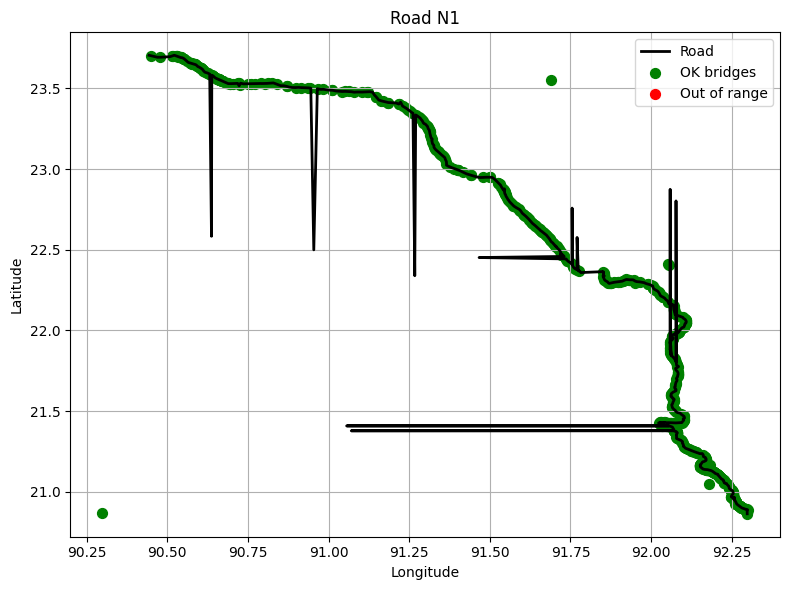

In [120]:
plot_road_with_bridges(
    'N1',
    roads_LRP_overview,
    test,          # your bridges dataframe
    lon_col='lon',
    lat_col='lat'
)

# algorithms checking distances
Not worked out yet

In [ ]:
#Calculate distance between two points
def distance_twopoints(lat1, lon1, lat2, lon2):
    R = 6371  # km

    lat1, lon1, lat2, lon2 = map(
        np.radians, [lat1, lon1, lat2, lon2]
    )

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2

    return 2 * R * np.arcsin(np.sqrt(a))

# df1["distance_km"] = haversine_np(
#     df1["lat"], df1["lon"],
#     df2["lat"], df2["lon"]
